<a href="https://colab.research.google.com/github/nomi217/Imdb_Urdu_Reviews/blob/main/Urdu_Review_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **`Download the Dataset from Kaggle Using IP`**

In [79]:
from zipfile import ZipFile
file_name='/imdb-dataset-of-50k-translated-urdu-review.zip'
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [80]:
import pandas as pd
import numpy as np

# **Get the train and test data from the path**

In [81]:
train_data=pd.read_csv('/content/imdb_urdu_reviews_train.csv')
train_data.head()

,review,sentiment
0,میں نے اسے 80 کی دہائی کے وسط میں ایک کیبل گائ...,positive
1,چونکہ میں نے 80 کی دہائی میں انسپکٹر گیجٹ کارٹ...,negative
2,ایک ایسے معاشرے کی حالت کے بارے میں تعجب کرتا ...,positive
3,مفید البرٹ پیون کی طرف سے ایک اور ردی کی ٹوکری...,negative
4,یہ کولمبو ہے جس کی ہدایتکاری اپنے کیریئر کے اب...,positive


In [82]:
test_data=pd.read_csv('/content/imdb_urdu_reviews_test.csv')
test_data.head()

,review,sentiment
0,یہ بے گھر خواتین کے بارے میں ایک دستاویزی فلم ...,negative
1,بالکل بھی اچھ ،ی کام نہیں کیا گیا ، پوری فلم ص...,negative
2,یہ عجیب بات ہے کہ کچھ لوگوں کا کیا حشر ہوتا ہے...,negative
3,اور یہ خاص طور پر وکیلوں اور پولیس اہلکاروں کے...,positive
4,پہلے ، ایک وضاحت: میری سرخی کے باوجود ، میں اس...,positive


# **Size of the Data**

In [83]:
print('Training Data: ', len(train_data))
print('Test Data: ', len(test_data))

Training Data:  40000
Test Data:  10000


# **I was used two splits in validation also but now  ignores this time**

In [84]:
#train=train_data[:30000]
#validation=train_data[30000:]
#print("Now training data size is: ",len(train))
#print("Now Validation data size is: ",len(validation))

# **Split data in input and output**

In [85]:
x_train=train_data['review'].values
y_train=train_data['sentiment'].values

In [86]:
x_train[2]

'ایک ایسے معاشرے کی حالت کے بارے میں تعجب کرتا ہے جو ایک ایسے والد کا پیدا کرتا ہے جیسے البرٹ ٹی فٹزجیرالڈ ، جو ہم پہلے طیارے میں ملتے ہیں ، جب وہ اس جگہ کی طرف جارہا تھا جہاں اس نے بہت عرصہ پہلے ترک کردیا تھا ، اور جہاں اس نے اپنی بیوی اور ایک بچ leftہ چھوڑا تھا۔ اب اس پر ایک ذہنی طور پر معذور لڑکے کے قتل کا الزام ہے۔ جب ہم اسے پہلی بار دیکھتے ہیں ، اس نے اس اخبار میں ایک عنوان پکڑا ہے جس کے سامنے والی عورت پڑھ رہی ہے۔ بلکہ بے رحمی کے ساتھ ، وہ اس سے پوچھتی ہے کہ کیا وہ اخبار رکھ سکتا ہے ، اور وہ خاتون دوسرے حصے پیش کرتی ہے۔ ٹھیک ہے ، یہ وہ نہیں ہے جو اس نے پوچھا ، وہ عورت کیا کرنا چاہتی ہے ، اسے وہ سامنے والا حص giveہ دے رہا ہے جس کو وہ پڑھ رہی ہے۔ میتھیو ریان ہوج نے اس پریشان کن فلم کو لکھا اور ہدایت کی ہے جو ہمارے معاشرے کی طرح کئی طرح سے عکاسی کرتی ہے۔ در حقیقت ، مسٹر ہوج بالکل اسی طرف اشارہ کر رہے ہیں جو اس میں غلط ہے۔ اس فلم میں لیلینڈ کو ایک نوعمر عمر پیش کیا گیا ہے ، جو خیالی اور حقیقت میں بھی فرق نہیں کرسکتا ہے۔ یہ بات عیاں ہے کہ کسی انسان کو قتل کرنا ، یہاں تک کہ اس پیارے او

In [87]:
y_train[2]

'positive'

In [88]:
x_test=test_data['review'].values
y_test=test_data['sentiment'].values

In [89]:
x_test[2]

'یہ عجیب بات ہے کہ کچھ لوگوں کا کیا حشر ہوتا ہے۔ ڈی وی ڈی خوردہ فروش میں ڈسکاؤنٹ بِن کی تلاش کرتے وقت ، میں مہلک جبلت کی ایک کاپی لے کر آیا۔ کسی بھی فلم کا کلیکٹر ہونے کے ناطے جو کہ سائنس فائی ، ہارر یا غیر ملکی راکشسوں کی خاصیت رکھتا ہے ، میں نے اسے خریدنے کا فیصلہ کیا (اس حقیقت کا ذکر نہیں کرنا کہ اس پر پانچ ڈالر لاگت آئے گی - ایک سودا ہے ، مجھ پر یقین کریں)۔ اسے دیکھنے کے بعد ، میں نے اس رائے کو دیکھا کہ یہ کوئی خاص بات نہیں ہے۔ لیکن انٹرنیٹ پر کچھ تحقیق کرنے کے بعد ، میں نے دریافت کیا کہ یہ فلم دراصل بریڈرز کہلاتی تھی اور وہ ٹم کنکیڈ ہارر فلک کا ریمیک تھا جس نے 1980 کی دہائی کے وسط میں ویڈیو اسٹوروں کو تیز کیا۔ جو میں پہلے ہی دیکھ چکا ہوں۔ اس دریافت کے بعد "مہلک جبلت" کی میری تعریف میں اضافہ ہوا۔ ایک پرائیوٹ گرلز کالج کے ساتھ والے لان میں ایک الکا دہل گر کر تباہ ہوگئی۔ وہاں کے واحد استاد ایشلے (ٹوڈ جینسن نے ادا کیا۔ یہ ٹھیک ہے ، وہ لڑکا جو چار سال قبل کلٹ فِلک سائبرگ COP میں سائبرگ میں تبدیل ہو جاتا ہے) ، نوٹس کیا کہ کچھ طلباء غائب ہونے لگے ہیں ، جبکہ ایک سیاہ فام واقعے کا سامنا کر

In [90]:
y_test[2]

'negative'

In [91]:
x_train=x_train[:1000]
y_train=y_train[:1000]
print('Size of x_train: ',len(x_train))
print('Size of y_train: ',len(y_train))

Size of x_train:  1000
Size of y_train:  1000


In [92]:
x_test=x_test[:1000]
y_test=y_test[:1000]
print('Size of x_test: ',len(x_test))
print('Size of y_test: ',len(y_test))

Size of x_test:  1000
Size of y_test:  1000


#**Extract Training Label**

In [93]:
labels=[]
for label_type in y_train:
  if label_type=="negative":
    labels.append(0)
  else:
    labels.append(1)

In [94]:
labels

[1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


#**Extract Testing Label**

In [95]:
test_labels=[]
for label_type in y_test:
  if label_type=="negative":
    test_labels.append(0)
  else:
    test_labels.append(1)

In [96]:
test_labels

[0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,


#**Tokenizing the test of the raw IMDB data**

In [97]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
maxlen=100
training_samples=800
validation_samples=200
max_words=10000
tokenizer=Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)
sequences=tokenizer.texts_to_sequences(x_train)
word_index=tokenizer.word_index
print('Found %s unique tokens. ' %len(word_index))
data=pad_sequences(sequences, maxlen=maxlen)
labels=np.asarray(labels)
print('Shape of data tensors: ', data.shape)
print(type(labels))
print('Shape of label tensors: ', labels.shape)

indices=np.arange(data.shape[0])
np.random.shuffle(indices)
data=data[indices]
labels=labels[indices]
x_train=data[:training_samples]
y_train=labels[:training_samples]
x_val=data[training_samples: training_samples+validation_samples]
y_val=labels[training_samples: training_samples+validation_samples]

Found 16782 unique tokens. 
Shape of data tensors:  (1000, 100)
<class 'numpy.ndarray'>
Shape of label tensors:  (1000,)


#**Tokenizing the test of the raw in Test IMDB data**

In [98]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
maxlen=100
training_samples=200
validation_samples=10000
max_words=10000
tokenizer=Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_test)
sequences=tokenizer.texts_to_sequences(x_test)
word_index=tokenizer.word_index
print('Found %s unique tokens. ' %len(word_index))
test_data=pad_sequences(sequences, maxlen=maxlen)
test_labels=np.asarray(labels)
print('Shape of data tensors: ', test_data.shape)
print(type(labels))
print('Shape of label tensors: ', test_labels.shape)

indices=np.arange(data.shape[0])
np.random.shuffle(indices)
test_data=test_data[indices]
test_labels=test_labels[indices]
x_test=test_data[:training_samples]
y_test=test_labels[:training_samples]
# x_val=data[training_samples: training_samples+validation_samples]
# y_val=labels[training_samples: training_samples+validation_samples]

Found 16808 unique tokens. 
Shape of data tensors:  (1000, 100)
<class 'numpy.ndarray'>
Shape of label tensors:  (1000,)


In [99]:
embeddings_index={}
embedding_dim=100
embedding_matrix=np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
  if i<max_words:
    embedding_vector=embeddings_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[i]=embedding_vector

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Flatten, Dense
model=Sequential()
model.add(Embedding(max_words,embedding_dim,input_length=maxlen))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [101]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable=False

#Compiltation
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

#**Start Training**

In [102]:
history=model.fit(x_train,y_train, epochs=20, batch_size=32,validation_split=0.2)

#save weight
model.save_weights('pre_trained_model.h5')

Epoch 1/20
20/20 [==============================] - 1s 13ms/step - loss: 0.6932 - acc: 0.4875 - val_loss: 0.6931 - val_acc: 0.5375
Epoch 2/20
20/20 [==============================] - 0s 7ms/step - loss: 0.6932 - acc: 0.4938 - val_loss: 0.6932 - val_acc: 0.4625
Epoch 3/20
20/20 [==============================] - 0s 7ms/step - loss: 0.6932 - acc: 0.4938 - val_loss: 0.6932 - val_acc: 0.4625
Epoch 4/20
20/20 [==============================] - 0s 8ms/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.4625
Epoch 5/20
20/20 [==============================] - 0s 7ms/step - loss: 0.6932 - acc: 0.5031 - val_loss: 0.6933 - val_acc: 0.4625
Epoch 6/20
20/20 [==============================] - 0s 9ms/step - loss: 0.6932 - acc: 0.4969 - val_loss: 0.6933 - val_acc: 0.4625
Epoch 7/20
20/20 [==============================] - 0s 7ms/step - loss: 0.6932 - acc: 0.5031 - val_loss: 0.6933 - val_acc: 0.4625
Epoch 8/20
20/20 [==============================] - 0s 7ms/step - loss: 0.6932 - acc: 0.5

#**Plotting Result**

<Figure size 432x288 with 0 Axes>

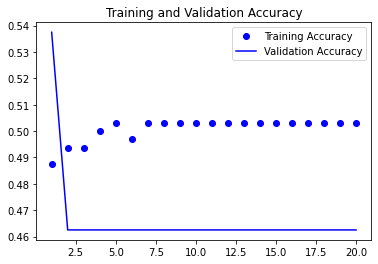

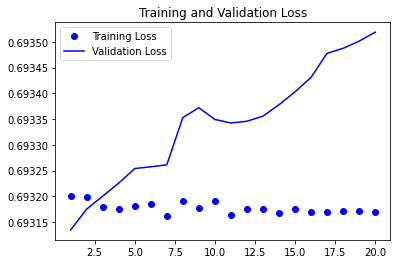

<Figure size 432x288 with 0 Axes>

In [103]:
import matplotlib.pyplot as plt
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs, acc,'bo', label='Training Accuracy')
plt.plot(epochs, val_acc,'b',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo', label='Training Loss')
plt.plot(epochs,val_loss,'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.figure()

#**Trained the same model with Embedding and SimpleRNN Layers**

In [104]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,SimpleRNN, Dense
max_features=10000
model=Sequential()
model.add(Embedding(max_features,32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [105]:
#Compiltation
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [106]:
#Start Training
history=model.fit(x_train,y_train, epochs=10,batch_size=128,validation_data=(x_val,y_val))

Epoch 1/10
7/7 [==============================] - 1s 68ms/step - loss: 0.7042 - acc: 0.4675 - val_loss: 0.6947 - val_acc: 0.4550
Epoch 2/10
7/7 [==============================] - 0s 34ms/step - loss: 0.5955 - acc: 0.7825 - val_loss: 0.7241 - val_acc: 0.5200
Epoch 3/10
7/7 [==============================] - 0s 34ms/step - loss: 0.4843 - acc: 0.8950 - val_loss: 0.7777 - val_acc: 0.4700
Epoch 4/10
7/7 [==============================] - 0s 35ms/step - loss: 0.3578 - acc: 0.9600 - val_loss: 0.7063 - val_acc: 0.5550
Epoch 5/10
7/7 [==============================] - 0s 33ms/step - loss: 0.3251 - acc: 0.9400 - val_loss: 0.7602 - val_acc: 0.4650
Epoch 6/10
7/7 [==============================] - 0s 33ms/step - loss: 0.2107 - acc: 0.9962 - val_loss: 0.8052 - val_acc: 0.5100
Epoch 7/10
7/7 [==============================] - 0s 33ms/step - loss: 0.1424 - acc: 1.0000 - val_loss: 0.8302 - val_acc: 0.4950
Epoch 8/10
7/7 [==============================] - 0s 33ms/step - loss: 0.1220 - acc: 1.0000 - val

#**Plotting Result**

<Figure size 432x288 with 0 Axes>

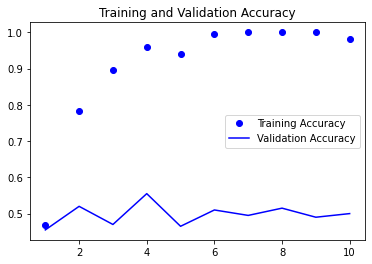

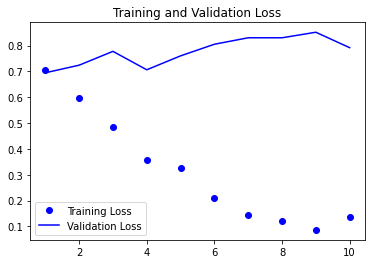

<Figure size 432x288 with 0 Axes>

In [107]:
import matplotlib.pyplot as plt
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs, acc,'bo', label='Training Accuracy')
plt.plot(epochs, val_acc,'b',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo', label='Training Loss')
plt.plot(epochs,val_loss,'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.figure()

#**Using the LSTM Layer**

In [108]:
from tensorflow.keras.layers import LSTM
#max_features=10000
model=Sequential()
model.add(Embedding(max_features,32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#Compilation
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

#Start Training
history=model.fit(x_train,y_train, epochs=10,batch_size=32,validation_data=(x_val,y_val))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
25/25 [==============================] - 3s 50ms/step - loss: 0.6928 - acc: 0.5050 - val_loss: 0.6902 - val_acc: 0.5900
Epoch 2/10
25/25 [==============================] - 1s 33ms/step - loss: 0.6757 - acc: 0.7075 - val_loss: 0.6348 - val_acc: 0.6600
Epoch 3/10
25/25 [==============================] - 1s 34ms/step - loss: 0.5830 - acc: 0.7900 - val_loss: 0.5860 - v

#**Plotting Result**

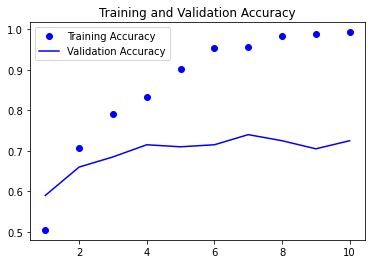

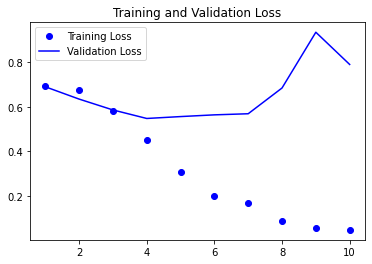

In [109]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs, acc,'bo', label='Training Accuracy')
plt.plot(epochs, val_acc,'b',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo', label='Training Loss')
plt.plot(epochs,val_loss,'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

#**Let's Evaluate the Model**

In [110]:
model.evaluate(x_test,y_test)

7/7 [==============================] - 0s 10ms/step - loss: 1.5411 - acc: 0.5000


[1.5411053895950317, 0.5]